## Polynomial Regression

### Exercise 01: Synthetic Data

#### Polynomial Regression extends Linear Regression by modeling the relationship between the features and target variable as an n-degree polynomial. Here’s how to implement it step by step using numpy.

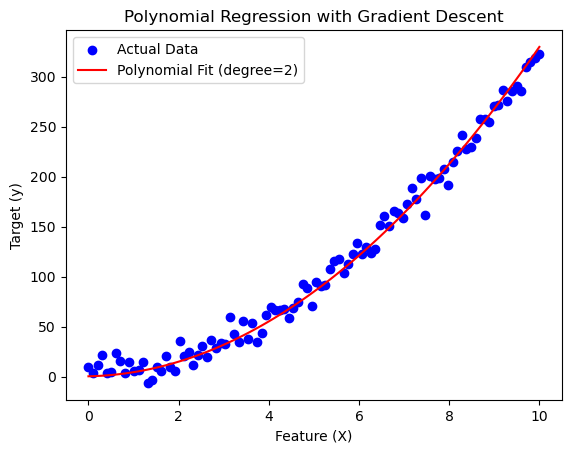

Model Coefficients (w): [0.91094471 3.2039161 ]
Model Intercept (b): 0.3064880841042958


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Feature: 100 points between 0 and 10
y = 3 * X**2 + 2 * X + 5 + np.random.randn(100, 1) * 10  # Target: Quadratic relationship with noise

# Step 2: Create Polynomial Features
def create_polynomial_features(X, degree):
    X_poly = np.hstack([X**i for i in range(1, degree + 1)])
    return X_poly

degree = 2  # Degree of the polynomial
X_poly = create_polynomial_features(X, degree)

# Step 3: Initialize Parameters
w = np.zeros((X_poly.shape[1], 1))  # Weights (coefficients)
b = 0  # Bias
learning_rate = 0.0001
n_iterations = 1000
m = X_poly.shape[0]  # Number of samples

# Step 4: Define Helper Functions
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_cost(X, y, w, b):
    predictions = predict(X, w, b)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error**2)
    return cost

def compute_gradients(X, y, w, b):
    predictions = predict(X, w, b)
    error = predictions - y
    dw = (1 / m) * np.dot(X.T, error)
    db = (1 / m) * np.sum(error)
    return dw, db

# Step 5: Gradient Descent
cost_history = []
for i in range(n_iterations):
    dw, db = compute_gradients(X_poly, y, w, b)
    w -= learning_rate * dw
    b -= learning_rate * db
    cost = compute_cost(X_poly, y, w, b)
    cost_history.append(cost)

# Step 6: Make Predictions
y_pred = predict(X_poly, w, b)

# Step 7: Visualize the Results
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label=f"Polynomial Fit (degree={degree})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression with Gradient Descent")
plt.legend()
plt.show()

# Step 8: Print Model Parameters
print("Model Coefficients (w):", w.ravel())
print("Model Intercept (b):", b)